In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
from operator import attrgetter

from wordcloud import WordCloud,STOPWORDS

import re
from datetime import datetime
from collections import defaultdict,Counter

In [2]:
df_profile = pd.read_excel ('Eightfold_TakeHomeExercise_Dataset (1).xlsx', sheet_name='Sheet 1- Profile Data')
df_profile.head()

,pr_id,title,current_work,Job Function,current_work_start_date,current_work_end_date,current_work_tenure_years,seniority_level,total_work_ex_years,industries,country,state,gender,race,education_level,latest_major,graduation_year
0,281475007078686,"Human Resources, People Analytics",NaN,HR,NaT,NaN,NaN,Mid-Level,13.083333,[u'human resources'],US,"NY,US",male,hispanic,Masters,Data Science,2014.0
1,281475077896530,Director Talent Acquisition,Children's Medical Center,HR,2019-01-01,Current,2.0,Director,19.666667,[u'staffing and recruiting'],US,"TX,US",male,white,Masters,NaN,NaN
2,281475010016657,Human Resources,NaN,HR,NaT,NaN,NaN,Manager,13.666667,"[u'hospital & health care', u'human resources']",US,"MN,US",male,white,Bachelors,Psychology,NaN
3,281475049443638,Corporate Human Resources Manager,NaN,HR,2008-07-01,Current,12.0,Manager,25.166667,[u'defense & space'],US,"VA,US",male,white,Bachelors,NaN,1988.0
4,281475028393526,Executive Compensation & Workforce Analytics,United Technologies,HR,2016-01-01,Current,4.0,Mid-Level,17.500000,[u'consumer goods'],US,"CT,US",male,white,Masters,NaN,NaN


In [3]:
df_exp = pd.read_excel ('Eightfold_TakeHomeExercise_Dataset (1).xlsx', sheet_name='Sheet 2 - Experience')
df_exp.head()

,exp_id,start_date,end_date,location,pr_id,title,work
0,0,NaN,NaN,NaN,281475007078686,"Human Resources, People Analytics",NaN
1,1,2016-07-01 00:00:00,NaN,"New York, New York, United States",281475007078686,"Human Resources, People Analytics Specialist",IBM
2,2,2014-07-01 00:00:00,2016-05-01 00:00:00,NaN,281475007078686,"MBA Candidate and Graduate Assistant, Class of 2016",Purdue University Krannert School of Management
3,3,2015-05-01 00:00:00,2015-08-01 00:00:00,NaN,281475007078686,Workforce Planning and Recruitment MBA Intern,IBM
4,4,2013-01-01 00:00:00,2013-12-01 00:00:00,NaN,281475007078686,Global IT Project Manager,ExxonMobil


### Data Cleaning 

In [4]:
df_profile.describe()

,pr_id,current_work_tenure_years,total_work_ex_years,graduation_year
count,1.386500e+04,11063.000000,13865.000000,9252.000000
mean,2.814750e+14,4.454578,14.973798,2005.998487
std,3.387361e+07,4.593953,8.485559,9.628546
min,2.814750e+14,0.000000,0.000000,1900.000000
25%,2.814750e+14,2.000000,8.750000,2000.000000
50%,2.814750e+14,3.000000,14.000000,2008.000000
75%,2.814750e+14,5.000000,20.583333,2013.000000
max,2.814751e+14,48.000000,50.750000,2024.000000


#### Checking for Nulls

In [5]:
# percentage of Nulls
df_profile.isnull().sum()/len(df_profile)

pr_id                        0.000000
title                        0.001226
current_work                 0.136459
Job Function                 0.000000
current_work_start_date      0.206491
current_work_end_date        0.206563
current_work_tenure_years    0.202092
seniority_level              0.006275
total_work_ex_years          0.000000
industries                   0.018969
country                      0.000000
state                        0.000000
gender                       0.138911
race                         0.105373
education_level              0.146051
latest_major                 0.445943
graduation_year              0.332708
dtype: float64

In [6]:
df_profile[df_profile["title"].isnull()].head()

,pr_id,title,current_work,Job Function,current_work_start_date,current_work_end_date,current_work_tenure_years,seniority_level,total_work_ex_years,industries,country,state,gender,race,education_level,latest_major,graduation_year
5465,281475028795517,NaN,NaN,Unknown,NaT,NaN,NaN,Entry,0.0,[u'human resources'],US,"GA,US",NaN,NaN,Masters,NaN,NaN
6053,281475046798407,NaN,NaN,Unknown,NaT,NaN,NaN,Entry,0.0,NaN,US,"NC,US",female,asian,Masters,NaN,2013.0
6380,281475040636655,NaN,NaN,Unknown,NaT,NaN,NaN,Entry,0.0,[u'information technology and services'],US,"FL,US",male,white,NaN,General,2001.0
7005,281475033305757,NaN,Hurrata Thrisp,Unknown,NaT,NaN,NaN,Intern,0.0,[u'human resources'],US,"NY,US",male,white,Masters,NaN,2009.0
7135,281475012844565,NaN,NaN,Unknown,NaT,NaN,NaN,Entry,0.0,[u'information technology and services'],US,"CA,US",female,asian,Bachelors,NaN,2003.0


In [7]:
# We see that most of intern and entry level title people
# filling in an entry level title in null values

df_profile["title"].fillna("Analyst",inplace=True)

In [8]:
# Filling Other in nulls in current work, ( assuming the person could not find their company in drop down)

df_profile["current_work"].fillna("Other",inplace=True)

Text(0.5, 1.0, 'Distribution of Years of Experience')

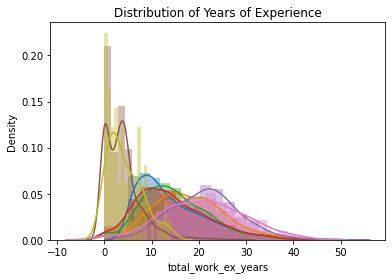

In [9]:
for level in df_profile["seniority_level"].unique():
    sns.distplot(df_profile[df_profile["seniority_level"]==level]["total_work_ex_years"],bins=20)
    plt.plot()
    
plt.title("Distribution of Years of Experience")

In [10]:
levels = {}
for level in df_profile["seniority_level"].unique():
    levels[level]=df_profile[df_profile["seniority_level"]==level]["total_work_ex_years"].median()

In [11]:
levels

{'Mid-Level': 12.25,
 'Director': 17.25,
 'Manager': 14.0,
 'Senior': 13.0833333333333,
 'Vice President': 21.1666666666666,
 'Entry': 3.41666666666666,
 'CXO': 20.9166666666666,
 nan: nan,
 'Intern': 3.4574200913241953}

In [12]:
df_profile["seniority_level"].values[600:610]

array(['Manager', 'Manager', nan, 'Director', 'Senior', 'Director',
       'Senior', 'Mid-Level', 'Mid-Level', 'Director'], dtype=object)

In [13]:
def get_the_level(row):
    min_diff = float('inf')
    seniority_level = ""
    exp=row["total_work_ex_years"]
    
    try:
        j =  len(row["seniority_level"])
        return row["seniority_level"]
    except:
        for level,median_exp in levels.items():
            if abs(exp- median_exp)<min_diff:
                min_diff = abs(exp- median_exp)
                seniority_level = level
        return seniority_level
    


In [14]:
# filling seniority level based on years of experience

df_profile["seniority_level"]= df_profile.apply(lambda x : get_the_level(x),axis=1)

#### Checking date irregularities

In [15]:
#Changing the misprint of 1900 to 2000

df_exp['start_date'] = pd.to_datetime(df_exp['start_date'], errors='coerce')

df_exp.loc[84177,"start_date"] = "2000-05-01"
df_exp.loc[84177,"end_date"] = "2001-08-01"
df_exp.loc[14686,"start_date"] = "1999-12-31"
df_exp.loc[14686,"end_date"] = "2001-01-01"


In [16]:
df_exp['start_date'] = pd.to_datetime(df_exp['start_date'], errors='coerce')

### Exploratory Data Analysis

#### 1. State

Text(0.5, 1.0, 'Most popular Work locations')

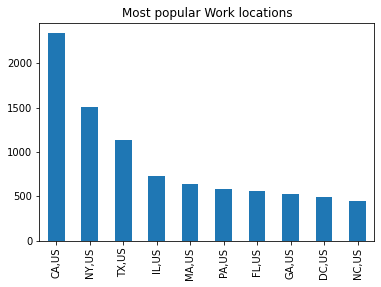

In [17]:
# As we know CA, NY and Tx are the most locations when it comes to companies, therefore we see that in the below graph
# professionals with People Analytics related experience in the United States

df_profile["state"].value_counts()[:10].plot(kind="bar")
plt.title("Most popular Work locations")

In [18]:
x =df_profile["Job Function"].value_counts()[:9].index =['HR', 'Analytics', 'Strategy', 'Leadership', 'Sales', 'Unknown',
       'IT', 'SDE', 'Finance']
y= df_profile["Job Function"].value_counts()[:9].values

Text(0.5, 1.0, 'Most popular Work Functions')

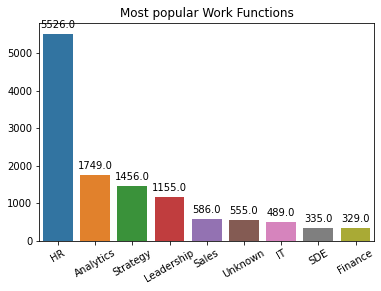

In [19]:
splot=sns.barplot(x=x,y=y)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set_xticklabels(rotation=30,labels=x)
plt.title("Most popular Work Functions")

#### 2. seniority_level

Text(0.5, 1.0, 'Number of profiles in each Seniority Level')

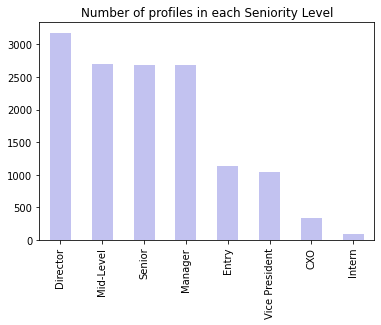

In [20]:
df_profile["seniority_level"].value_counts()[:10].plot(kind="bar",color="#c2c2f0")
plt.title("Number of profiles in each Seniority Level")

Text(0.5, 1.0, 'Distribution of YoE')

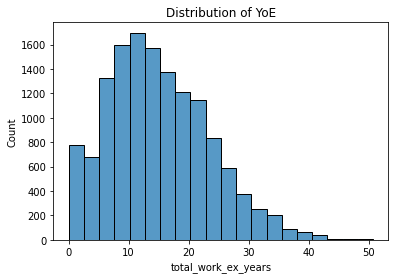

In [21]:
sns.histplot(df_profile["total_work_ex_years"],bins=20)
plt.title("Distribution of YoE")

#### 3. Gender and seniority_level

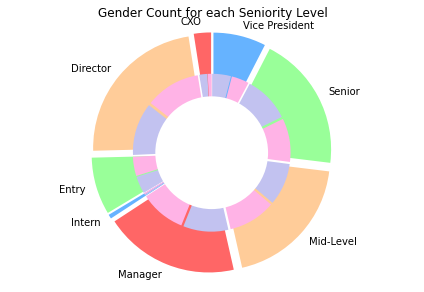

In [22]:
# ref https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

import matplotlib.pyplot as plt
 
# Data to plot
labels = df_profile["seniority_level"].value_counts().sort_index().index
sizes = df_profile["seniority_level"].value_counts().sort_index().values

labels_gender = ['Female','Male']*len(df_profile["seniority_level"].unique())
sizes_gender = df_profile.groupby(["seniority_level","gender"])["title"].count().values
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0']*len(df_profile["seniority_level"].unique())
explode = [0.2]*8
explode_gender = [0.1]*16
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3)

ax= plt.pie(sizes_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=2 )

#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.title("Gender Count for each Seniority Level")
plt.show()

#### 4. Race

In [23]:
df_profile["race"].value_counts()[:4]

white       9366
asian       1975
hispanic     612
black        450
Name: race, dtype: int64

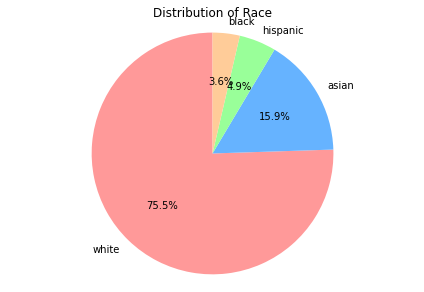

In [24]:
import matplotlib.pyplot as plt
# Pie chart
labels = df_profile["race"].value_counts().index[:4]
sizes = df_profile["race"].value_counts().values[:4]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Distribution of Race")

plt.show()

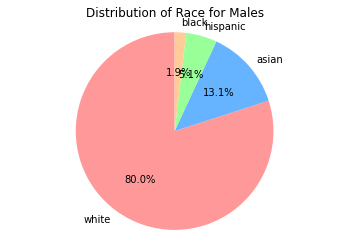

In [25]:
df_m = df_profile[df_profile["gender"]=="male"]

import matplotlib.pyplot as plt
# Pie chart
labels = df_m["race"].value_counts().index[:4]
sizes = df_m["race"].value_counts().values[:4]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
#plt.tight_layout()
plt.title("Distribution of Race for Males")
plt.show()

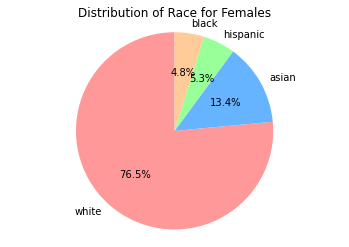

In [26]:
df_m = df_profile[df_profile["gender"]=="female"]

import matplotlib.pyplot as plt
# Pie chart
labels = df_m["race"].value_counts().index[:4]
sizes = df_m["race"].value_counts().values[:4]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
#plt.tight_layout()
plt.title("Distribution of Race for Females")
plt.show()

#### 5. Education_level

Text(0.5, 1.0, 'Count of Profiles in most recent Education level')

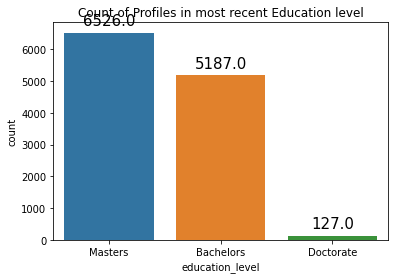

In [27]:
#plt.figure(figsize=(8, 6))
splot = sns.countplot(df_profile["education_level"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
plt.title("Count of Profiles in most recent Education level")


#### 6. Past countries

In [28]:
def func(x):
    try:
        return x.split(",")[-1]
    except:
        return "null"

df_Series = df_exp[df_exp["location"].notnull()]["location"].apply(func)

df_exp = df_exp.merge(df_Series,how="left",left_index=True, right_index=True).\
rename(columns={"location_x":"location", "location_y":"country"})



df_exp = df_exp[~df_exp.index.duplicated()]


val = df_exp.groupby("pr_id")["country"].unique().values



In [29]:
countries_set=[]
for i in val:
    for j in i:
        if not pd.isna(j) and j!=" United States" and j!="United States":
            countries_set.append(j)

[Text(0, 0.5, 'Number Of professional')]

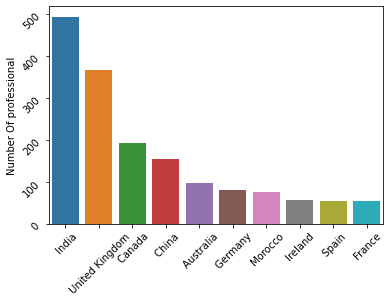

In [30]:
g =sns.barplot(x=list(map( lambda x : x[0],Counter(countries_set).most_common(10))), \
            y=list(map( lambda x : x[1],Counter(countries_set).most_common(10))))
g.tick_params(labelrotation=45)
g.set(ylabel="Number Of professional")

#### 7. Advanced Degree (Masters)

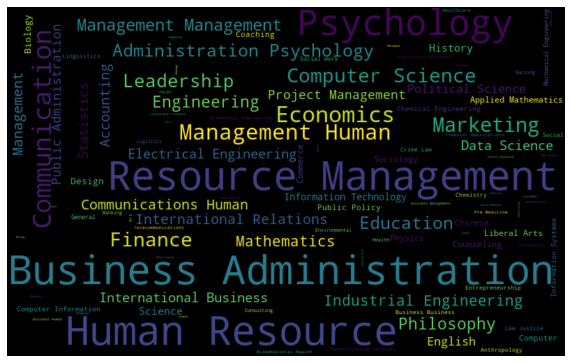

In [31]:
all_words = ' '.join([text for text in df_profile[df_profile["education_level"]=="Masters"]["latest_major"].values  if isinstance(text, str)])
stop_words = [] + list(STOPWORDS)

wordcloud = WordCloud(stopwords = stop_words,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 8. Education level and seniority

Text(0.5, 1.0, 'Count of profiles in each education level and each seniority level')

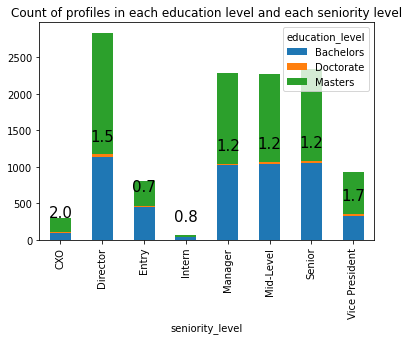

In [32]:

d_2 = df_profile.pivot_table( values="title",index=["seniority_level"],columns = ["education_level"],aggfunc="count")
values_= d_2["Masters"]/d_2["Bachelors"]

splot = d_2.plot(kind='bar', stacked=True)

for p,i in zip(splot.patches,values_):
    splot.annotate(format(i, '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.title("Count of profiles in each education level and each seniority level")


#### 9. Education level and Gender

Text(0.5, 1.0, 'Count of profiles in each gender and each education level')

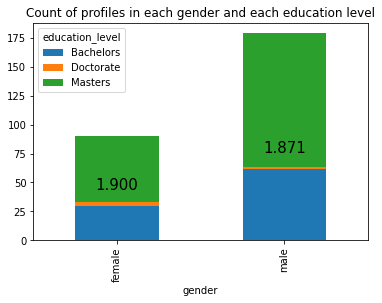

In [33]:

d_2 = df_profile[df_profile["seniority_level"]=="CXO"].pivot_table( values="title",index=["gender"],columns = ["education_level"],aggfunc="count")
values_= d_2["Masters"]/d_2["Bachelors"]

splot = d_2.plot(kind='bar', stacked=True)

for p,i in zip(splot.patches,values_):
    splot.annotate(format(i, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.title("Count of profiles in each gender and each education level")


#### 10. YOE and Gender

Text(0.5, 1.0, 'Count of each gender')

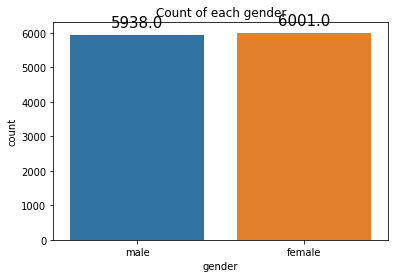

In [34]:
splot = sns.countplot(df_profile["gender"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
plt.title("Count of each gender")


Text(0.5, 1.0, 'Distribution of Yoe for each gender')

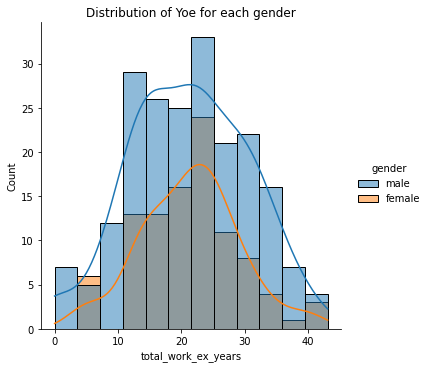

In [35]:
sns.displot(data=df_profile[df_profile["seniority_level"]=="CXO"], x="total_work_ex_years", hue="gender",kde=True)
plt.title("Distribution of Yoe for each gender")


#### 11. Industry

In [36]:
dict_of_levels= defaultdict(lambda:0)
for ind in df_profile["industries"]:
    try:
        for each in ind.split(","):
            values= re.findall(r"'(.*?)'", each, re.DOTALL)
            dict_of_levels[values[0]]= dict_of_levels.get(values[0],0)+1
            #print (values[0])
    except:
        pass  

In [37]:
sorted(dict_of_levels.items(), key=lambda k_v: k_v[1], reverse=True)[:5]


[('human resources', 4203),
 ('information technology and services', 2057),
 ('computer software', 1345),
 ('management consulting', 1327),
 ('financial services', 1193)]

#### 12. Job Function and Seniority Level

In [38]:
df_profile.groupby(["Job Function","seniority_level"]).size().head()

Job Function                 seniority_level
Architecture & Construction  Entry              1
                             Manager            2
                             Mid-Level          7
                             Senior             2
Arts & Communication         CXO                3
dtype: int64

#### 13. Seniority level and YoE

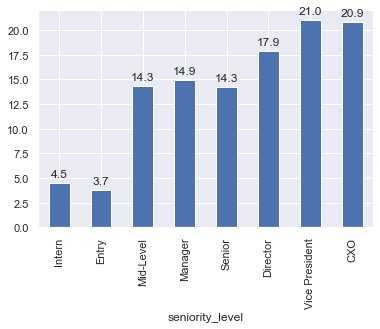

In [84]:
splot = df_profile.groupby("seniority_level")["total_work_ex_years"].mean().plot(kind="bar")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
#splot.set_xticklabels('Number Of titles',"total_work_ex_years")

### Merging with Experience Data

#### 1. Correlation between Number of titles and Total work Experience in Years

In [39]:
df_merged = df_profile.merge(df_exp, left_on = "pr_id",right_on = "pr_id",how="left").\
rename(columns= {"title_x":"Present_title","title_y":"Past_title"})

df_merged_group = df_merged.groupby(["pr_id","gender","seniority_level"]).\
agg({"Past_title":"nunique","total_work_ex_years":"max"}).reset_index()

In [40]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-2*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+2*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

In [41]:
df_merged_group = remove_outliers(df_merged_group,"Past_title").sort_values(by=["Past_title"])

- Number of Past-titles, YoE for each gender
- Unlike expected, that more the number of titles more the number of years of experience, We see that there is very low correlation(0.32) between number of years of experience and number of titles
- This means that, Professionals are staying for longer duration at the same role, but on further investigation it can be concluded that this can be because of data irregularities. 




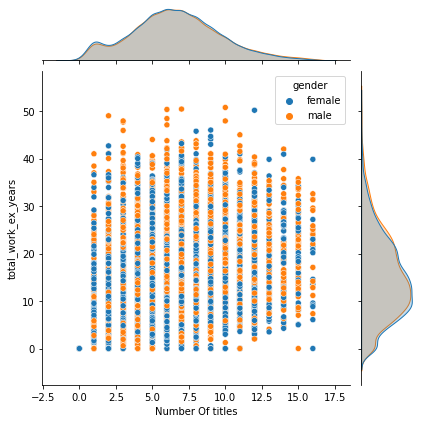

In [42]:
#I came across entries like "281474993745600" and "281474994233336" who have mentioned only one role, which is incorrect

ax= sns.jointplot(x="Past_title", y="total_work_ex_years", data=df_merged_group,hue="gender")
ax.set_axis_labels('Number Of titles',"total_work_ex_years")

#### 2. Number of Job functions in each Gender

In [43]:
df_merged_group.groupby("gender")["Past_title"].mean()

gender
female    6.558276
male      6.661672
Name: Past_title, dtype: float64

#### 3. Number of Past roles, seniority level and gender

<Figure size 3240x2160 with 0 Axes>

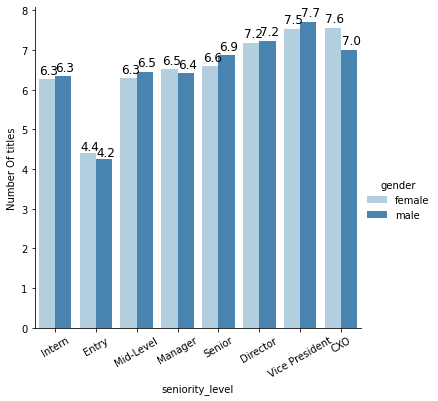

In [44]:
level_seniority = ["Intern","Entry","Mid-Level","Manager","Senior","Director","Vice President","CXO"]

df_merged_group['seniority_level']  = pd.Categorical(df_merged_group['seniority_level'], level_seniority)

df_merged_group2 = df_merged_group.groupby(["gender","seniority_level"])["Past_title"].mean().reset_index()
g = sns.catplot(x = "seniority_level",y="Past_title",hue="gender",data=df_merged_group2,kind="bar",palette='Blues')

plt.figure(figsize=(45,30))
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.1f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
    
g.set_xticklabels(rotation=30)
g.set(ylabel="Number Of titles")



#### 4. Identifying Profiles with Gap and Total YoE

In [45]:
def get_years_of_exp_gap(df_test):
    df_test=df_test[["start_date","end_date"]]
    df_test = df_test.dropna().drop_duplicates().sort_values(by =["start_date"])
    #print(len(df_test))
    overall_months =[]
    #print (df_test)
    for start,end in zip(df_test["start_date"],df_test["end_date"]):
        #print (start,end)
        if end=="Current":
            overall_months.extend(pd.date_range(start,datetime.now().strftime("%Y-%b"), freq='MS').\
                                  strftime("%Y-%b").tolist())
        else:
            overall_months.extend(pd.date_range(start,end, freq='MS').strftime("%Y-%b").tolist())

            #print (start,end, len(pd.date_range(start,end, freq='MS').strftime("%Y-%b").tolist()))
    try:
        if "Current" not in df_test["end_date"].values:
            til_date = max(df_test["end_date"])
        else:
            til_date = datetime.now()
            
    except:
        til_date = datetime.now()

    #print ((df_test["start_date"]))

    total = (pd.to_datetime(til_date).to_period('M') - pd.to_datetime(min(df_test["start_date"])).to_period('M')).n
    worked = (len(set(overall_months)))
    #print (total,worked,total - worked+1)
    return (round(worked/12,2) , max(0,round((total - worked+1)/12,2)))


In [46]:
"""df_test= df_exp[df_exp["pr_id"]==281475005303150]

if "Current" in df_test["end_date"].values:
    til_date = datetime.now()
else:
    til_date = max(df_test["end_date"])


til_date

"Current" in df_test["end_date"].values

get_years_of_exp_gap(df_test)"""


dict_of_exp={}
for ids in df_exp["pr_id"].unique():
    try:
        dict_of_exp[ids]= get_years_of_exp_gap(df_exp[df_exp["pr_id"]==ids][["start_date","end_date"]])
    except:
        dict_of_exp[ids] = (0,0)

In [47]:
df_details = pd.DataFrame.from_dict(dict_of_exp).T
df_details.columns=["YoE","Gap"]


In [48]:
df_profile = df_profile.merge(df_details, left_on= "pr_id",right_index=True,how="left")

#### 5. Gap, Gender and YOE

In [49]:
df_profile.columns

Index(['pr_id', 'title', 'current_work', 'Job Function',
       'current_work_start_date', 'current_work_end_date',
       'current_work_tenure_years', 'seniority_level', 'total_work_ex_years',
       'industries', 'country', 'state', 'gender', 'race', 'education_level',
       'latest_major', 'graduation_year', 'YoE', 'Gap'],
      dtype='object')

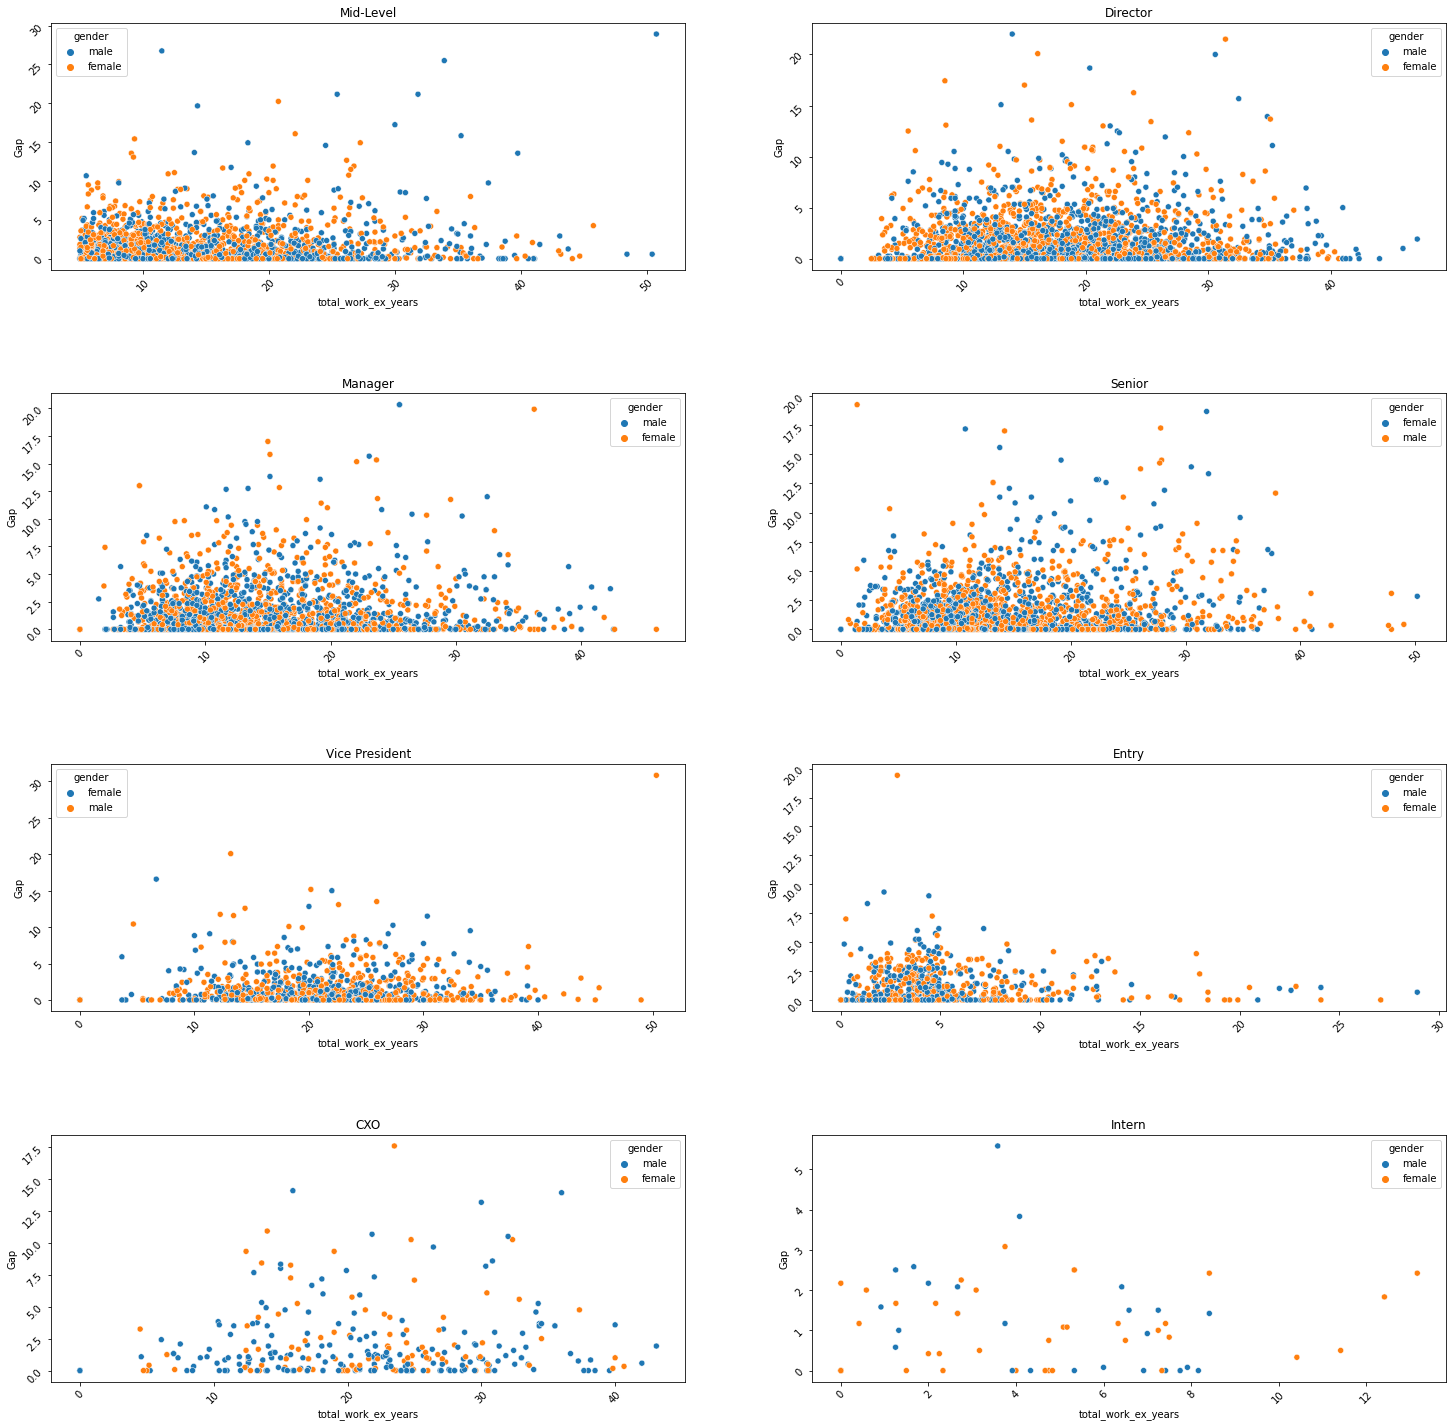

In [50]:
#sns.set(font_scale=2) 
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
axes = axes.flatten()
for i,j in zip(df_profile.seniority_level.unique(),axes):

    sns.scatterplot(x = "total_work_ex_years",y="Gap",hue="gender",data=df_profile[df_profile["seniority_level"]==i],ax=j)
    #sns.barplot(x="feature",y="tfidf",data=df,ax=j)

    j.set_title(i)
    j.tick_params(labelrotation=45)
plt.subplots_adjust(hspace = 0.5)

    


<AxesSubplot:xlabel='total_work_ex_years', ylabel='Gap'>

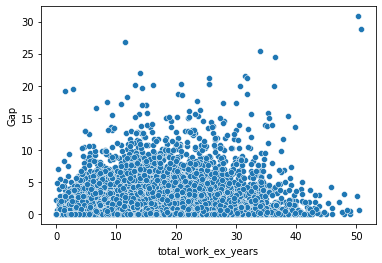

In [51]:
sns.scatterplot(x = "total_work_ex_years",y="Gap",data=df_profile)

#### 6. Age Approxiamations

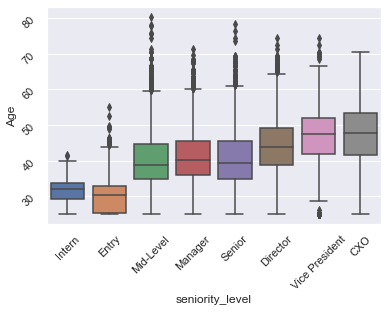

In [52]:
df_profile["Age"]= df_profile["YoE"]+ df_profile["Gap"] + 25

df_profile['seniority_level']=pd.Categorical(df_profile['seniority_level'], level_seniority)

sns.set(font_scale=1) 
j=sns.boxplot(x="seniority_level", y="Age", data=df_profile)
j.tick_params(labelrotation=45)

#### 7. Age Approxiamations with race

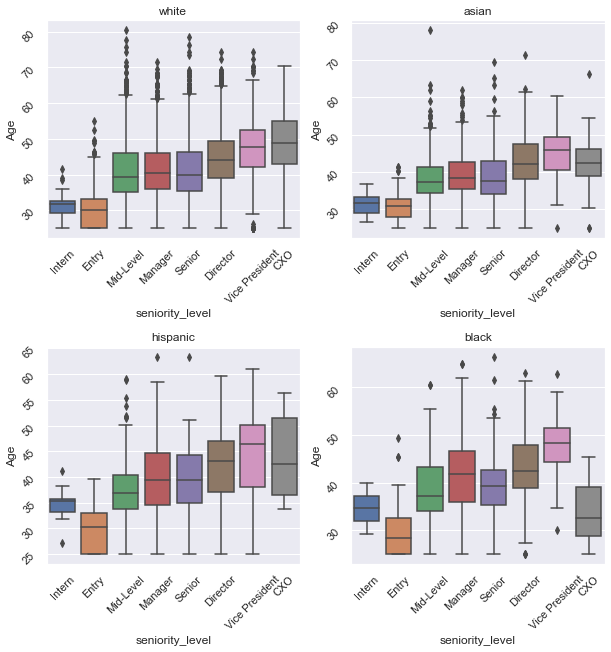

In [53]:
sns.set(font_scale=1) 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i,j in zip(["white","asian","hispanic","black"],axes):

    sns.boxplot(x="seniority_level", y="Age", data=df_profile[df_profile["race"]==i],ax=j)    

    j.set_title(i)
    j.tick_params(labelrotation=45)
plt.subplots_adjust(hspace = 0.5)

#### 8. Age Approxiamations with Gender

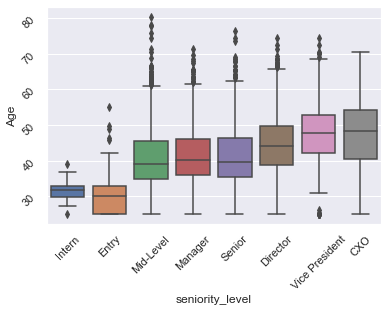

In [54]:
j=sns.boxplot(x="seniority_level", y="Age", data=df_profile[df_profile["gender"]=="male"])
j.tick_params(labelrotation=45)

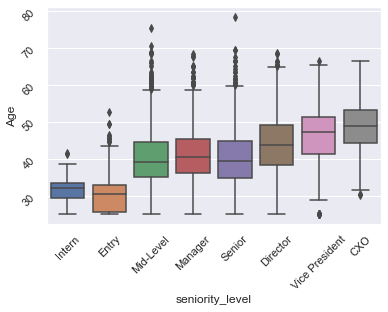

In [55]:
j=sns.boxplot(x="seniority_level", y="Age", data=df_profile[df_profile["gender"]=="female"])
j.tick_params(labelrotation=45)

#### 9. Tenure at each role(Years at each title)

In [56]:
df_profile.head()

,pr_id,title,current_work,Job Function,current_work_start_date,current_work_end_date,current_work_tenure_years,seniority_level,total_work_ex_years,industries,country,state,gender,race,education_level,latest_major,graduation_year,YoE,Gap,Age
0,281475007078686,"Human Resources, People Analytics",Other,HR,NaT,NaN,NaN,Mid-Level,13.083333,[u'human resources'],US,"NY,US",male,hispanic,Masters,Data Science,2014.0,9.25,1.83,36.08
1,281475077896530,Director Talent Acquisition,Children's Medical Center,HR,2019-01-01,Current,2.0,Director,19.666667,[u'staffing and recruiting'],US,"TX,US",male,white,Masters,NaN,NaN,20.58,1.17,46.75
2,281475010016657,Human Resources,Other,HR,NaT,NaN,NaN,Manager,13.666667,"[u'hospital & health care', u'human resources']",US,"MN,US",male,white,Bachelors,Psychology,NaN,6.42,0.00,31.42
3,281475049443638,Corporate Human Resources Manager,Other,HR,2008-07-01,Current,12.0,Manager,25.166667,[u'defense & space'],US,"VA,US",male,white,Bachelors,NaN,1988.0,26.00,0.08,51.08
4,281475028393526,Executive Compensation & Workforce Analytics,United Technologies,HR,2016-01-01,Current,4.0,Mid-Level,17.500000,[u'consumer goods'],US,"CT,US",male,white,Masters,NaN,NaN,17.92,0.75,43.67


In [57]:
df_profile = df_profile.merge(df_merged_group[["pr_id","Past_title"]],left_on="pr_id",right_on="pr_id",how="left")
df_profile["Tenure_at_each_role"]= df_profile["total_work_ex_years"]/df_profile["Past_title"]

<AxesSubplot:xlabel='race', ylabel='Tenure_at_each_role'>

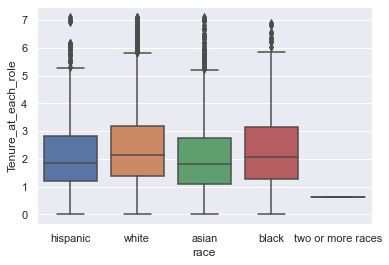

In [58]:
sns.boxplot(x="race",y="Tenure_at_each_role",data=remove_outliers(df_profile,"Tenure_at_each_role"))

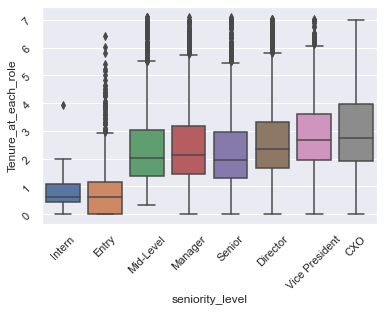

In [61]:
j=sns.boxplot(x="seniority_level",y="Tenure_at_each_role",data=remove_outliers(df_profile,"Tenure_at_each_role"))
j.tick_params(labelrotation=45)

#### 10. Gap, gender and Race

In [67]:
df_3 = df_profile.groupby(["gender","race"]).agg({"Gap":"mean","total_work_ex_years":"mean"}).reset_index()

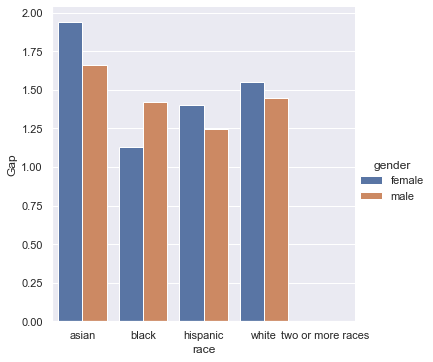

In [72]:
sns.catplot(x= "race", y="Gap",data=df_3,kind="bar", hue="gender")

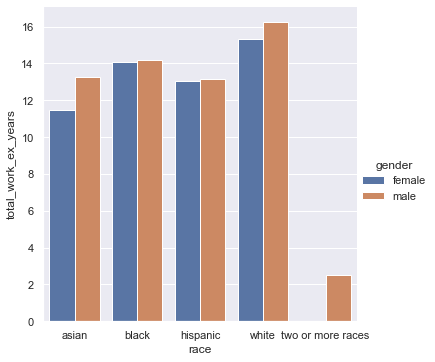

In [73]:
sns.catplot(x= "race", y="total_work_ex_years",data=df_3,kind="bar", hue="gender")

In [60]:
df_profile.to_csv("df_profile_full_data.csv")